### Missing value imputation- Categorical variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Projects\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
cat_var = df.select_dtypes(include = 'object')
cat_var

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [4]:
cat_var.isnull().sum()/df.shape[0]*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [5]:
var_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_var.drop(columns= var_drop, axis=1, inplace=True)
cat_var.shape

C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1460, 38)

In [6]:
isnull_per = cat_var.isnull().mean()*100
isnull_per

MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functional       0.000000
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PavedDrive       0.000000
SaleType         0.000000
SaleCondition    0.000000
dtype: float

In [7]:
miss_var = isnull_per[isnull_per >0].keys()
miss_var

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [8]:
cat_var['MasVnrType'].mode()

0    None
dtype: object

In [9]:
cat_var['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [10]:
cat_var['MasVnrType'].fillna(cat_var['MasVnrType'].mode()[0])

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [11]:
for var in miss_var:
    cat_var[var].fillna(cat_var[var].mode()[0], inplace= True)
    print(var,"=",cat_var[var].mode()[0])

MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


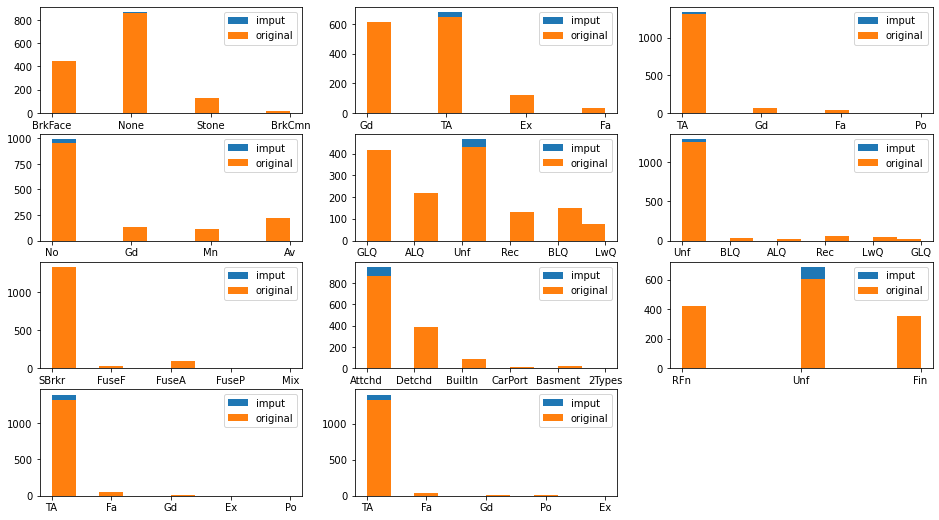

In [13]:
plt.figure(figsize=(16,9))
for i, var in enumerate(miss_var):
    plt.subplot(4,3,i+1)
    plt.hist(cat_var[var], label='imput')
    plt.hist(df[var].dropna(), label='original')
    plt.legend()

In [18]:
df.update(cat_var)
df.drop(columns=var_drop, inplace=True)

In [19]:
df.select_dtypes(include ='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

## Feature Scaling

### Standardization and Normalization

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [6]:
df2.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [7]:
df3 = df2.fillna(df2.mean())

In [8]:
#convert data into matrix and vector

X = df3.drop("survived", axis=1)
Y = df3["survived"]
print("Shape of X", X.shape)
print("Shape of Y", Y.shape)


Shape of X (891, 3)
Shape of Y (891,)


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state =51)
print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of Y train", Y_train.shape)
print("Shape of Y train", Y_test.shape)

Shape of X train (712, 3)
Shape of X test (179, 3)
Shape of Y train (712,)
Shape of Y train (179,)


In [12]:
sc = StandardScaler()   # create standard scaler
sc.fit(X_train)

StandardScaler()

In [13]:
sc.mean_     # standard scaler created let's check mean and std deviation 

array([ 2.30617978, 29.55409121,  0.39185393])

In [14]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [15]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [19]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [23]:
# now convert this data into dataframe
X_train_sc = pd.DataFrame(X_train_sc, columns = ['pclass','age', 'parch'])
X_test_sc = pd.DataFrame(X_test_sc, columns = ['pclass','age', 'parch'])

In [30]:
X_train_sc.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [31]:
X_train_sc.describe()   # here we dont get mean as zero

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,-2.732253,-2.274856,-0.491985
std,1.185586,0.077027,1.256415
min,-4.565658,-2.447470,-1.109689
25%,-3.512929,-2.319613,-1.109689
50%,-1.758380,-2.273997,-1.109689
75%,-1.758380,-2.242590,-1.109689
max,-1.758380,-2.029298,6.772123


In [32]:
X_train_sc.describe().round(2)  # somthing wrong here supposed to be mean 0 and std = 1

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


In [33]:
mmc = MinMaxScaler()   # now we fit our data into min max scaler
mmc.fit(X_train)

MinMaxScaler()

In [34]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [35]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [36]:
# now convert this data into dataframe
X_train_mmc = pd.DataFrame(X_train_mmc, columns = ['pclass','age', 'parch'])
X_test_mmc = pd.DataFrame(X_test_mmc, columns = ['pclass','age', 'parch'])

In [37]:
X_train_mmc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


In [39]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


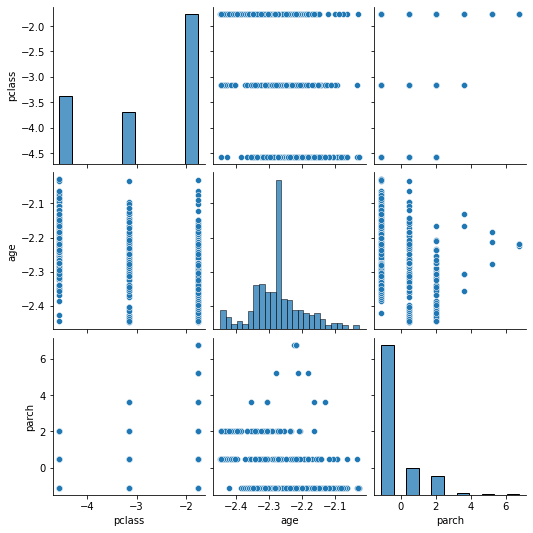

In [41]:
sns.pairplot(X_train_sc)

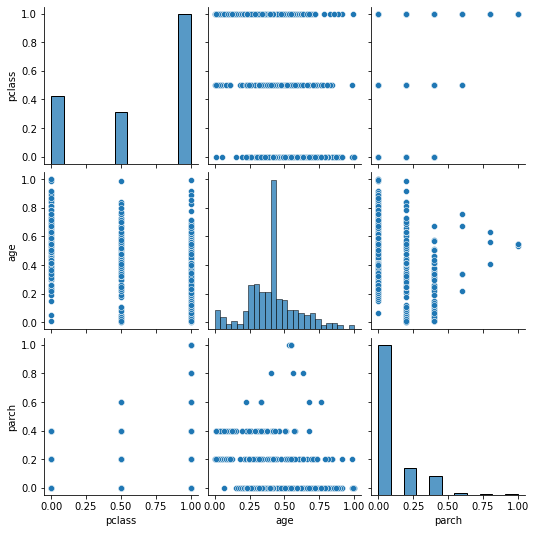

In [42]:
sns.pairplot(X_train_mmc)

Note: distribution does not effected by standscaler and minmaxscaler

## Train Test

In [44]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df3 = df2.fillna(df2.mean())
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [46]:
# select X and y
X = df3.drop("survived", axis = 1)   # this is Matrix
y = df3['survived']                 # this is vector

In [47]:
print("X shape =", X.shape)
print("Y shape =", y.shape)

X shape = (891, 3)
Y shape = (891,)


In [48]:
# now we have to do train and test but for this first import train test
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=51)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 3)
Shape of X_test: (179, 3)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [54]:
X_train

,pclass,age,parch
770,3,24.000000,0
152,3,55.500000,0
731,3,11.000000,0
775,3,18.000000,0
324,3,29.699118,2
...,...,...,...
528,3,39.000000,0
709,3,29.699118,1
736,3,48.000000,3
485,3,29.699118,1


## Data Cleaning

### Missing value imputation using scikit -learn

#### For numerical and categorical data

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
train = pd.read_csv(r"D:\Projects\train.csv")
test = pd.read_csv(r"D:\Projects\test.csv")
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)   # no target col in test dataset

Shape of train: (1460, 81)
Shape of test: (1459, 80)


In [58]:
train.head()   # target col is SalePrice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
X_train = train.drop(columns="SalePrice")
y_train = train['SalePrice']

print("Shape of train:", X_train.shape)
print("Shape of train:", y_train.shape)

Shape of train: (1460, 80)
Shape of train: (1460,)


In [61]:
# Numerical missing value imputation
num_var = X_train.select_dtypes(include=['int64','float64']).columns
num_var

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [62]:
X_train[num_var].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [63]:
imputer_mean = SimpleImputer(strategy='mean')
# imputer_mean = SimpleImputer(strategy='constant', fill_value=10)

In [64]:
imputer_mean.fit(X_train[num_var])

SimpleImputer()

In [65]:
imputer_mean.statistics_   # ab tk hmare nan value me mean nhi gya h

array([7.30500000e+02, 5.68972603e+01, 7.00499584e+01, 1.05168281e+04,
       6.09931507e+00, 5.57534247e+00, 1.97126781e+03, 1.98486575e+03,
       1.03685262e+02, 4.43639726e+02, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 1.16262671e+03, 3.46992466e+02, 5.84452055e+00,
       1.51546370e+03, 4.25342466e-01, 5.75342466e-02, 1.56506849e+00,
       3.82876712e-01, 2.86643836e+00, 1.04657534e+00, 6.51780822e+00,
       6.13013699e-01, 1.97850616e+03, 1.76712329e+00, 4.72980137e+02,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 4.34890411e+01, 6.32191781e+00,
       2.00781575e+03])

In [66]:
imputer_mean.transform(X_train[num_var])   # this is in array form convert to dataframe

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [68]:
X_train[num_var]= imputer_mean.transform(X_train[num_var])
test[num_var]= imputer_mean.transform(test[num_var])

In [69]:
X_train[num_var].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [70]:
test[num_var].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### Categorical misssing value imputation

In [71]:
cat_var = X_train.select_dtypes(include=['O']).columns
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [72]:
X_train[cat_var].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [73]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [75]:
imputer_mode.fit(X_train[cat_var])

SimpleImputer(strategy='most_frequent')

In [76]:
imputer_mode.statistics_

array(['RL', 'Pave', 'Grvl', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl',
       'NAmes', 'Norm', 'Norm', '1Fam', '1Story', 'Gable', 'CompShg',
       'VinylSd', 'VinylSd', 'None', 'TA', 'TA', 'PConc', 'TA', 'TA',
       'No', 'Unf', 'Unf', 'GasA', 'Ex', 'Y', 'SBrkr', 'TA', 'Typ', 'Gd',
       'Attchd', 'Unf', 'TA', 'TA', 'Y', 'Gd', 'MnPrv', 'Shed', 'WD',
       'Normal'], dtype=object)

In [77]:
X_train[cat_var]= imputer_mode.transform(X_train[cat_var])
test[cat_var]= imputer_mode.transform(test[cat_var])

In [78]:
X_train[cat_var].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [79]:
test[cat_var].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64